# Use case 1: Shower tracks

In [1]:
import showermodel as sm

The `ShowerModel` package includes tools to make geometric calculations and to visualize the projection of linear shower tracks in the local coordinate system of a telescope. This notebook describes the use of the classes `Track`, `Telescope` and `Projection`.

### Construction of a shower track

The default `Track` object corresponds to a vertical shower with impact point at the origin of coordinates. By default, the track is assumed to start at the top of the atmosphere at 112.83 km a.s.l and to end at ground level at 2.20 km a.s.l., where the atmosphere is discretized in 550 steps. However, the atmosphere extension and discritization as well as the track initial point can be modified when constructing a `Track` object.

In [2]:
# Default vertical track
# track = sm.Track()

# Track with impact point at 0.5 km east, 0.1 km north, zenith angle of 20 degrees and azimuth angle of 30 degrees
# track = sm.Track(x0=0.5, y0=0.1, theta=20., az=30.)  # alt=70. can be used instead of theta=20.

# Setting ground level and top of the atmosphere (km asl), and the number of discretization steps
track = sm.Track(theta=20., h0=1.8, h_top=100., N_steps=600)

# Setting track initial point. Note that theta may be greater than 90 degrees (ascending track). If so, x0, y0 can
# be given instead of xi, yi
# track = sm.Track(xi=0.5, yi=0.1, zi=14., theta=160.)

The generated `Track` object is a subclass of `DataFrame` and stores the (x, y, z) coordinates in km of each track point and the travel time in microseconds assuming the speed of light.

In [3]:
track

,x,y,z,t
0,0.0,0.029785,0.081833,348.282762
1,0.0,0.089355,0.245500,347.701807
2,0.0,0.148924,0.409167,347.120851
3,0.0,0.208494,0.572833,346.539896
4,0.0,0.268064,0.736500,345.958940
...,...,...,...,...
595,0.0,35.473813,97.463500,2.614299
596,0.0,35.533383,97.627167,2.033344
597,0.0,35.592953,97.790833,1.452388
598,0.0,35.652522,97.954500,0.871433


A `Track` object has also some useful attributes and methods.

In [4]:
track = sm.Track(x0=0.5, y0=0.1, theta=20., az=120., h0=1.8)

print("Unit vector parallel to shower axis (upwards):", (track.ux, track.uy, track.uz))
print("Coordinates of ground impact point:", (track.x0, track.y0, 0.))
print("Coordinates of shower point at 3.5 km a.s.l.:", track.h_to_xyz(3.5))
print("Travel time in us of shower front at 27 km above observation level:", track.z_to_t(27.))

Unit vector parallel to shower axis (upwards): (0.29619813272602386, -0.17101007166283427, 0.9396926207859084)
Coordinates of ground impact point: (0.5, 0.1, 0.0)
Coordinates of shower point at 3.5 km a.s.l.: (1.0358526974630422, -0.20937469912627193, 1.7)
Travel time in us of shower front at 27 km above observation level: 298.272204399376


Help on `Track`.

In [5]:
# track?

### Calculation of the shower track projection relative to a telescope position

The default `Telescope` object corresponds to a telescope positioned at the origin of coordinates, pointing at zenith direction and with an angular aperture of 10 degrees. These parameters can be modified by the user (see also UC3).

In [6]:
# Telescope positioned at 0.1 km east and 0.2 km south
# telescope = sm.Telescope(x=0.1, y=-0.2)

# Setting the pointing direction and aperture
telescope = sm.Telescope(x=0.1, y=-0.2, z=0.1, theta=20., az=120., apert=12.)

Help on `Telescope`.

In [7]:
# sm.Telescope?

The `Projection` constructor calculates the coordinates (alt/az and theta/phi) of a shower track relative to a telescope position.

In [8]:
projection = sm.Projection(telescope, track)

Equivalent methods of `Track` and `Telescope` objects are also available.

In [9]:
# Equivalent method of Track objects
# projection = track.Projection(telescope)

# Equivalent method of Telescope object
# projection = telescope.Projection(track)

The generated `Projection` object is a subclass of `DataFrame`.

In [10]:
projection

,distance,alt,az,theta,phi,beta,time,FoV
0,0.515540,0.103984,56.887513,81.003132,306.074599,81.003132,1.447039,False
1,0.588703,20.151143,63.697352,59.876772,306.074599,59.876772,0.974510,False
2,0.720876,34.150606,69.578691,44.939486,306.074599,44.939486,0.698813,False
3,0.886033,43.201629,74.608921,35.078197,306.074599,35.078197,0.533135,False
4,1.068993,49.134256,78.897894,28.446219,306.074599,28.446219,0.426844,False
...,...,...,...,...,...,...,...,...
545,117.162399,69.891810,119.345934,0.249013,306.074599,0.249013,0.000030,True
546,117.377224,69.892011,119.347125,0.248557,306.074599,0.248557,0.000023,True
547,117.592049,69.892210,119.348311,0.248103,306.074599,0.248103,0.000017,True
548,117.806874,69.892409,119.349493,0.247651,306.074599,0.247651,0.000010,True


Note 1: `beta` is the angular distance (in degrees) of each shower point relative to the apparent position of the cosmic-ray source (at infinity).

Note 2: `time` is the arrival time (in microseconds) of light emitted from each shower point and reaching the telescope.

There are some useful attributes and methods of both `Telescope` and `Projection` objects.

In [11]:
print("Angular aperture in degrees of the telescope:", telescope.apert)
print("Unit vector parallel to the telescope pointing direction:", (telescope.ux, telescope.uy, telescope.uz))
print("Position angle (from north) of the right-hand direction from the telescope point of view:", telescope.phi_right)
print("FoV coordinates theta/phi corresponding to alt=72., az=120. relative to telescope:",
      telescope.altaz_to_thetaphi(72., 120.))  # Equivalent to projection.altaz_to_thetaphi(72., 120.)
print("theta/phi coordinates of the apparent position of the cosmic-ray source:", (projection.theta_inf, projection.phi_inf))
print("Angular distance of the ground interaction point relative to the apparent position of the cosmic-ray source:",
      projection.beta_0)

Angular aperture in degrees of the telescope: 12.0
Unit vector parallel to the telescope pointing direction: (0.29619813272602386, -0.17101007166283427, 0.9396926207859084)
Position angle (from north) of the right-hand direction from the telescope point of view: 151.51876171866053
FoV coordinates theta/phi corresponding to alt=72., az=120. relative to telescope: (1.9999999999999472, 61.51876171866053)
theta/phi coordinates of the apparent position of the cosmic-ray source: (0.0, 255.55500518658698)
Angular distance of the ground interaction point relative to the apparent position of the cosmic-ray source: 93.01201998391794


Help on `Projection`.

In [12]:
# sm.Projection?

### Shower track visualtization

`Projection` objects have also a method to visualize the shower track in both zenith projection or the telescope field of view projection. The generated plots can be stored in `PolarAxesSubplot` objects for later modification.

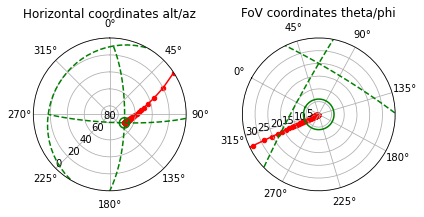

In [13]:
# Just show the plots
projection.show();  

# Store the plots in PolarAxesSubplot objects
# ax1, ax2 = projection.show()

# Equivalent method of Track objects
# projection, (ax1, ax2) = track.show_projection(telescope)

There are some plot options.

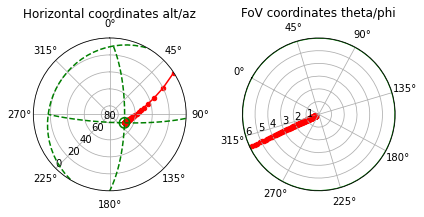

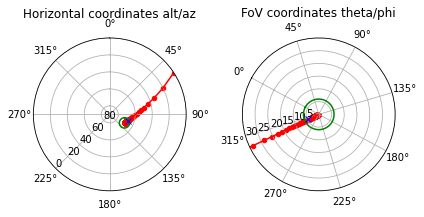

In [14]:
# Maximum offset angle in the FoV plot
projection.show(max_theta=6.);  # telescope.apert = 12.

# No axes and blue mark at slanth depth of 400 g/cm2 (it depends on atmosphere model, see UC2)
projection.show(axes=False, X_mark=400.); 

Help on `projection.show` method.

In [15]:
# projection.show?

### Example of track 'search'

These tools can be used to determine the telescope pointing direction to observe different parts of a shower track.

In [28]:
# Ascending shower starting at ground level (e.g., neutrino shower)
# We are only interested in the lower part of the atmosphere
track = sm.Track(x0=0.54, y0=-0.56, theta=120., az=47., h_top=5., N_steps=100) 
telescope = sm.Telescope(x=-0.2, y=-0.1, z=2.)  # Telescope placed on the top of a mountain
projection = sm.Projection(telescope, track)
projection.query('(alt < -30.)')  # Lower part of the shower

,distance,alt,az,theta,phi,beta,time,FoV
0,2.166322,-66.457085,123.416095,156.457085,236.583905,57.341759,0.042572,False
1,2.136623,-66.405229,126.575925,156.405229,233.424075,58.606148,0.130301,False
2,2.107994,-66.285723,129.801133,156.285723,230.198867,59.905528,0.221597,False
3,2.080478,-66.094190,133.072813,156.094190,226.927187,61.239981,0.316608,False
4,2.054121,-65.826885,136.370318,155.826885,223.629682,62.609439,0.415483,False
5,2.028967,-65.480823,139.671996,155.480823,220.328004,64.013670,0.518373,False
6,2.005063,-65.053888,142.956029,155.053888,217.043971,65.452267,0.625429,False
7,1.982452,-64.544891,146.201292,154.544891,213.798708,66.924626,0.736800,False
8,1.961180,-63.953599,149.388137,153.953599,210.611863,68.429937,0.852638,False
9,1.941291,-63.280716,152.499047,153.280716,207.500953,69.967173,0.973088,False


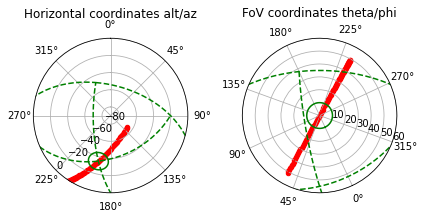

In [31]:
# Setting the new pointing and visualize the shower track
telescope = sm.Telescope(x=-0.2, y=-0.1, z=2., alt=-35., az=195., apert=20.)
projection = sm.Projection(telescope, track)
projection.show(max_theta=60.);

Note: As the telescope is looking down, the nadir projection is shown (left-side plot). In the FoV projection (right-side plot), the horizon line is up and the nadir point is shown.